In [1]:
# imports needed

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from pydataset import data

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

#import viz
np.random.seed(123)

In [2]:
# Acquire the data from the pydataset

df_iris = data('iris')
df_iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# Rename the columns

df_iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
# Assign the X

X = df_iris[['petal_width', 'sepal_width']]

In [5]:
# Scale the X (* especially important to scale since this is a distance-based algorithm *)
# StandardScaler is good for clustering

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [6]:
# Make sure everything looks right

X_scaled.head()

,petal_width,sepal_width
1,-1.315444,1.019004
2,-1.315444,-0.131979
3,-1.315444,0.328414
4,-1.315444,0.098217
5,-1.315444,1.249201


In [7]:
# Define the thing
kmeans = KMeans(n_clusters=3)

# Fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

In [8]:
# Make a new column named 'cluster' in iris and X_scaled dataframe

df_iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0


Text(0, 0.5, 'sepal width')

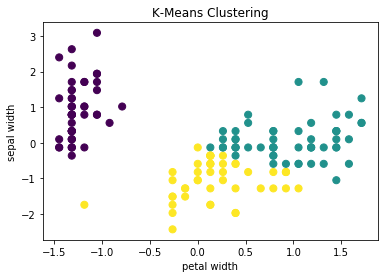

In [33]:
# Plot the clusters obtained using k means

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(X_scaled['petal_width'],X_scaled['sepal_width'],
                     c=X_scaled['cluster'],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('petal width')
ax.set_ylabel('sepal width')

In [10]:
# Show Cluster Centers (aka centroids) coordinates. The output is scaled

kmeans.cluster_centers_

array([[-1.25634413,  0.90625492],
       [ 0.96059584,  0.06891952],
       [ 0.18974112, -1.04776227]])

In [11]:
# Make a dataframe named centroids_scaled so that it's easier to plot

centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,petal_width,sepal_width
0,-1.256344,0.906255
1,0.960596,0.068920
2,0.189741,-1.047762


In [15]:
# Centroids of unscaled data for comparison

centroids = df_iris.groupby('cluster')['petal_width', 'sepal_width'].mean()
centroids

,petal_width,sepal_width
cluster,,
0,0.244898,3.451020
1,1.929091,3.087273
2,1.343478,2.602174


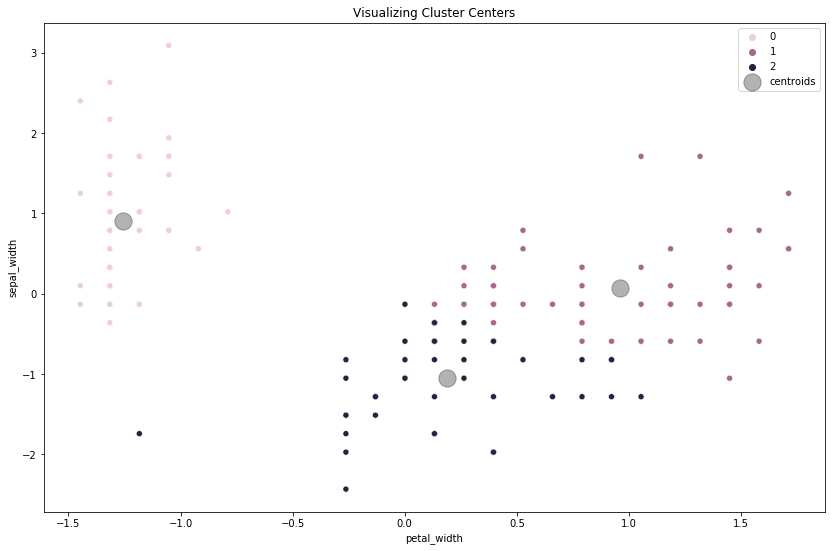

In [26]:
# Visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y = 'sepal_width', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_width', y = 'sepal_width', ax = plt.gca(), color ='k', alpha = 0.3, s = 300, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [9]:
kmeans.inertia_

79.24744370877897

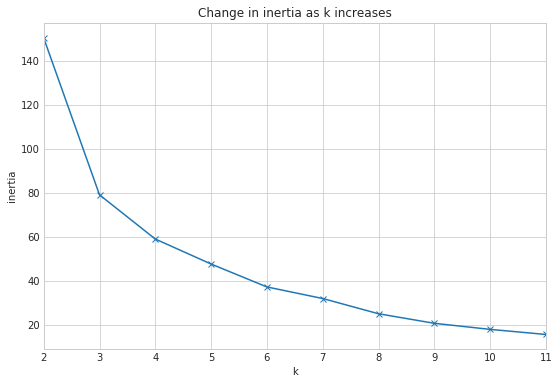

In [27]:
# Plot inertia vs k using the elbow method

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
# K means Clustering viz from Kaggle

def doKmeans(X, nclust=3):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(X_scaled, 3)
kmeans = pd.DataFrame(clust_labels)
X_scaled.insert((X_scaled.shape[1]),'kmeans',kmeans)